In [1]:
#!/usr/bin/python
import sys
from time import time
sys.path.append("../tools/")
from email_preprocess import preprocess
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


C:\Users\Yuichi Taguchi\Anaconda3\envs\py27\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
### features_train and features_test are the features for the training
### and testing datasets, respectively
### labels_train and labels_test are the corresponding item labels
features_train, features_test, labels_train, labels_test = preprocess()

no. of Chris training emails: 7936
no. of Sara training emails: 7884


In [3]:
#データ数1/100でRandomForestClassifierのパラメータを検証

num = len(features_train[0])
print "Amount of features_train: ", num

features_train_100 = features_train[:num/100]
labels_train_100 = labels_train[:num/100]

M_values = [2, 4, 8, 16, 32]

#やり方１：min_samples_splitの値を変えつつ、accuracyを各20回とって平均値を算出する
for M_value in M_values:
    print "Type: ", M_value
    pred_sum = []
    for i in range(20):
        clf = RandomForestClassifier(min_samples_split=M_value)
        clf.fit(features_train_100, labels_train_100)
        pred = clf.predict(features_test)
        acc = accuracy_score(labels_test, pred)
        pred_sum.append(acc)
    print "  Avarage: ", sum(pred_sum)/len(pred_sum)

#試行の結果、min_samples_splitは誤差だから2でいいと判断

Amount of features_train:  3785
Type:  2
  Avarage:  0.676763367463
Type:  4
  Avarage:  0.677901023891
Type:  8
  Avarage:  0.677332195677
Type:  16
  Avarage:  0.651166097838
Type:  32
  Avarage:  0.492036405006


[ 0.65585893  0.68657565  0.64163823  0.6814562   0.64220705  0.67292378
  0.62457338  0.68259386  0.67178612  0.66723549  0.72411832  0.67349261
  0.64277588  0.67974972  0.67633675  0.63822526  0.66951081  0.6513083
  0.68031854  0.6513083   0.56825939  0.60921502  0.49203641  0.52161547
  0.49203641  0.49203641  0.49203641  0.49203641  0.49203641  0.49203641
  0.49203641  0.49203641  0.49203641  0.49203641  0.49203641  0.49203641
  0.49203641  0.49203641  0.49203641  0.49203641  0.49203641  0.49203641
  0.49203641  0.49203641  0.49203641  0.49203641  0.49203641  0.49203641]


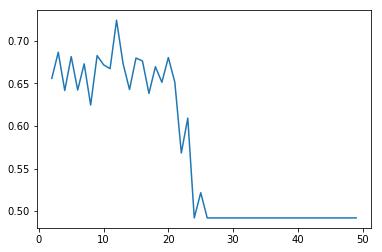

In [20]:
#やり方２：2から50まで1回ずつ回してグラフ化して傾向を見る
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

accuracy = []
i_range = []
for i in range(2, 50):
    clf_r = RandomForestClassifier(min_samples_split=i)
    clf_r.fit(features_train_100, labels_train_100)
    pred = clf_r.predict(features_test)
    accuracy.append(accuracy_score(labels_test, pred))
    i_range.append(i)

x = np.array(i_range)
y = np.array(accuracy)
plt.plot(x, y)
print y
#試行の結果、min_samples_splitは12あたりが良さそう（回すたびに結果は結構変わります）

In [21]:
#２の検証に基づいて、min_samples_splitのパラメータを12で実行
clf = RandomForestClassifier(min_samples_split=12)
clf.fit(features_train, labels_train)
pred = clf.predict(features_test)
accuracy_score(labels_test, pred)

0.99260523321956773